In [3]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [330]:
# reading data 

df_one = pd.read_csv("application.csv")
df_two = pd.read_csv("credit_record.csv")

In [331]:
df_one.head()

,Unnamed: 0,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,job,CNT_FAM_MEMBERS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [332]:
# Small preprocessing, just renaming columns and deleting index column
df_one.rename(columns = {'CNT_FAM_MEMBERS':'num_family_numbers'}, inplace = True)
del df_one['Unnamed: 0']
df_one['num_family_numbers'] = df_one['num_family_numbers'].astype(int)

In [333]:
df_one

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,job,num_family_numbers
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


In [334]:
df_two.head()

,Unnamed: 0,id,month_bal,status
0,0,5001711,0,X
1,1,5001711,-1,0
2,2,5001711,-2,0
3,3,5001711,-3,0
4,4,5001712,0,C


In [335]:
del df_two['Unnamed: 0']

In [336]:
df_two

,id,month_bal,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# WORKFLOW

This is what I would envision the workflow to be:

1. Looking at the data itself - using pd.describe(), pd.count(), pd.value_counts(), 
2. Filling missing data - using pd.fillna() or pd.dropna() 
3. Clean data - using pd.apply() or other stuff like that, basically grouping the data into categories
4. Visualize data - using matplotlib and seaborn

Approach itself:
- Don't need to fill in much to be honest
- There are inconsistencies across the different columns, so please convert what is appropriate to integers
- We're actually using two datasets here, so you have to think of how to use data from credit_record to use in application.csv (I have an idea how) 

In [337]:
print(f"Length of application.csv: {len(df_one)} \n")
print(f"Number of datapoints in each column: \n{df_one.count()} \n")

Length of application.csv: 438557 

Number of datapoints in each column: 
id                    438557
gender                438557
own_car               438557
own_realty            438557
num_child             438557
income                438557
income_type           438557
education_level       438557
family_status         438557
house_type            438557
birth_day             438557
employment_length     438557
mobile                438557
work_phone            438557
phone                 438557
email                 438557
job                   304354
num_family_numbers    438557
dtype: int64 



We can tell that for the "job" column, there are missing values. For the most part, we can just fill in the missing values with a value, which we will talk more about later.

In [338]:
empty = None 
print(f"Length of credit_record: {len(df_two)} \n")
print(f"Number of datapoints in each column: \n{df_two.count()} \n")
print(f"Count of unique class values: \n{df_two['status'].nunique()}")

Length of credit_record: 1048575 

Number of datapoints in each column: 
id           1048575
month_bal    1048575
status       1048575
dtype: int64 

Count of unique class values: 
8


# Part 2 
Missing data - I have no examples for you here :P Figure out the code with documentation. The hint is above in the workflow.

In [339]:
df_one['job'] = df_one['job']

#Replace the job based on their income type
#Assumption : Student do not have jobs, Pensioners do not have jobs

def job_replace(x):
    if x in ['Pensioner', 'Student']:
        return 'Unemployed'
    elif x == 'State servant':
        return 'Government'
    elif x == 'Commercial associate':
        return 'Sales'
    elif x == 'Working':
        return 'Unknown'

df_one['job'] = df_one['income_type'].apply(job_replace)
df_one.head()

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,job,num_family_numbers
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Unknown,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales,1


Expected output (well, part of it) - take a look at "job" column. (also the num_family_members is supposed to be int)
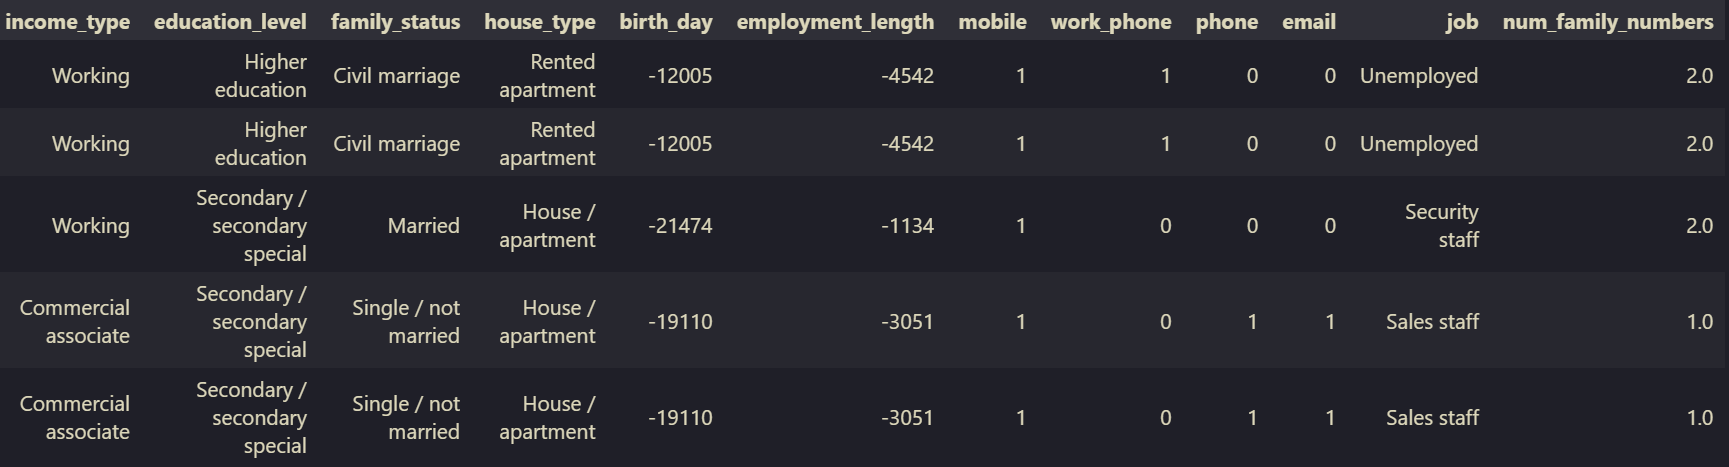

Part 3 - Clean data

- There will be some columns whereby we should change it to numeric data.
- As for other columns, we can use pd.get_dummies() to convert it to a one-hot encoding.
- There will be some columns that will have a lot of unique values, and therefore we will use a different approach to this. 

In [340]:
# Using pd.apply()
def yes_no_convert(x):
    if x == 'Y':
        return 1
    else:
        return 0

df_one['own_car'] = df_one['own_car'].apply(yes_no_convert)
df_one['own_realty'] = df_one['own_realty'].apply(yes_no_convert)

In [341]:
# Let's get dummies for some of these columns
gender = pd.get_dummies(df_one['gender'])
gender.rename(columns = {'M':'is_male', 'F': 'is_female'}, inplace = True)
gender 

,is_female,is_male
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
438552,0,1
438553,1,0
438554,1,0
438555,1,0


You can tell what happens when we create dummies. We essentially create new columns for each unique value in the column.

In [342]:
# We join the two dataframes together, don't worry about what "join" does
df_one = pd.concat([df_one, gender], axis = 1, join = 'inner')
# We then drop the old "gender" column
df_one.drop('gender', axis = 1, inplace = True)

Columns to do dummy this for:
income_type, education_level, family_status, house_type 

Pros and cons of this approach:
Pros:
- The data is probably a lot more useable, I think it's very hard to use the data as it is.

Cons:
- Adds more dimensions to the data, which means that the data is more sparse.

In [343]:
#log income, birth_day to age, employment_length to years
#apply dummy to income_type, education_level, fam_status, house_type

for column in ['income_type', 'education_level', 'family_status', 'house_type', 'job']:
    dummies = pd.get_dummies(df_one[column])
    df_one = pd.concat([df_one, dummies], axis = 1, join = 'inner')
    df_one.drop(column, axis = 1, inplace = True)

# There are other kinds of scaling that we can use, for example we can use np.log1p()
df_one['income'] = df_one['income'].apply(np.log1p)
df_one['birth_day'] = df_one['birth_day'].apply(lambda x: -x//365)
df_one['employment_length'] = df_one['employment_length'].apply(lambda x: -x//365 if x<0 else -1)
df_one.rename(columns = {'birth_day':'age', 'employment_length': 'years_of_employment'}, inplace = True)

# Use this to check
df_one.head()
df_one

,id,own_car,own_realty,num_child,income,age,years_of_employment,mobile,work_phone,phone,...,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Government,Sales,Unemployed,Unknown
0,5008804,1,1,0,12.965712,32,12,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,5008805,1,1,0,12.965712,32,12,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,5008806,1,1,0,11.630717,58,3,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,5008808,0,1,0,12.506181,52,8,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,5008809,0,1,0,12.506181,52,8,1,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,1,0,11.813037,62,-1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
438553,6840222,0,0,0,11.547337,43,8,1,0,0,...,0,1,0,0,0,0,0,0,0,1
438554,6841878,0,0,0,10.896758,22,1,1,1,0,...,0,0,0,0,0,1,0,1,0,0
438555,6842765,0,1,0,11.184435,59,-1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


Part 3.5 - Utilising the credit_record.csv

- We will be using the credit_record.csv to add into the first dataset.
- We will create a new dataset so that we can join it with the first dataset.

Dataset will consist of:
1. Number of Xs (no loan for the months)
2. Number of Cs (paid off that month)
3. Sum of the statuses (e.g. 4 1s + 3 2s = 4(1) + 3(2) = 10)

In [344]:
# Groupby for count_X
count_X = df_two[df_two['status'] == 'X'].groupby('id').count()['status']
count_X = pd.DataFrame(count_X)

# Making count_X neater 
count_X.reset_index(inplace = True)
count_X.rename(columns = {'status':'count_X', 'index': 'id'}, inplace = True)

In [345]:
# Groupby for count_C
count_C = df_two[df_two['status'] == 'C'].groupby('id').count()['status']
count_C = pd.DataFrame(count_C)

# Making count_C neater
count_C.reset_index(inplace = True)
count_C.rename(columns = {'status': 'count_C', 'index': 'id'}, inplace = True)

In [346]:
# Prepapration of data for months_late
months_late_data = df_two[df_two['status'] != 'X']
months_late_data = months_late_data[months_late_data['status'] != 'C']
months_late_data['status'] = months_late_data['status'].astype(int)

# Introduce error term here, 1-29 days should not go unpunished
months_late_data['status'] = months_late_data['status'].apply(lambda x: x+1)

In [347]:
# Groupby for months_late
months_late = months_late_data.groupby('id').sum()['status']
months_late = pd.DataFrame(months_late, dtype = int)

# Making months_late neater
months_late.reset_index(inplace = True)
months_late.rename(columns = {'status':'months_late'}, inplace = True)
months_late.head()


,id,months_late
0,5001711,3
1,5001712,10
2,5001717,17
3,5001718,28
4,5001719,2


In [348]:
merge_data = [count_C, months_late]
merged = count_X 
for data in merge_data:
    merged = pd.merge(merged, data, how = 'outer', on = 'id')

merged.fillna(0, inplace = True)
df_two = merged.astype(int).sort_values(by = 'id')
df_two.reset_index(inplace = True, drop = True)
df_two.head()

,id,count_X,count_C,months_late
0,5001711,1,0,3
1,5001712,0,9,10
2,5001713,22,0,0
3,5001714,15,0,0
4,5001715,60,0,0


In [349]:
# To see if the client has previous credit with the bank
df_one['has_previous_credit'] = df_one['id'].isin(df_two['id']).astype(int)

# Left merge onto df_one:
df_one = pd.merge(df_one, df_two, how = 'left', on = 'id')
df_one.fillna(0, inplace = True)


In [350]:
for column in df_one.columns:
    if 'int' not in str(df_one[column].dtype) and column != 'income':
        df_one[column] = df_one[column].astype(int)


In [352]:
# Save to new dataset
df_one.to_csv('application_cleaned.csv', index = False)